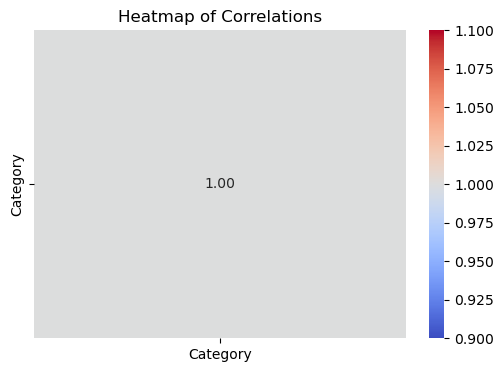

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (replace 'spam.csv' with your file path if needed)
data = pd.read_csv('spam.csv', encoding='latin1')

# Encode the 'Category' column to numerical values (ham: 0, spam: 1)
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Calculate the correlation matrix
correlation_matrix = data.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, fmt=".2f")
plt.title('Heatmap of Correlations')
plt.show()


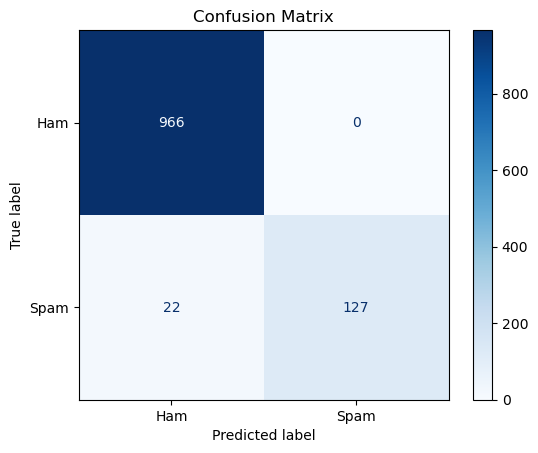

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin1')

# Encode the 'Category' column (ham: 0, spam: 1)
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Split data into features and target
X = data['Message']
y = data['Category']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Predict on the test set
y_pred = model.predict(X_test_vectorized)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


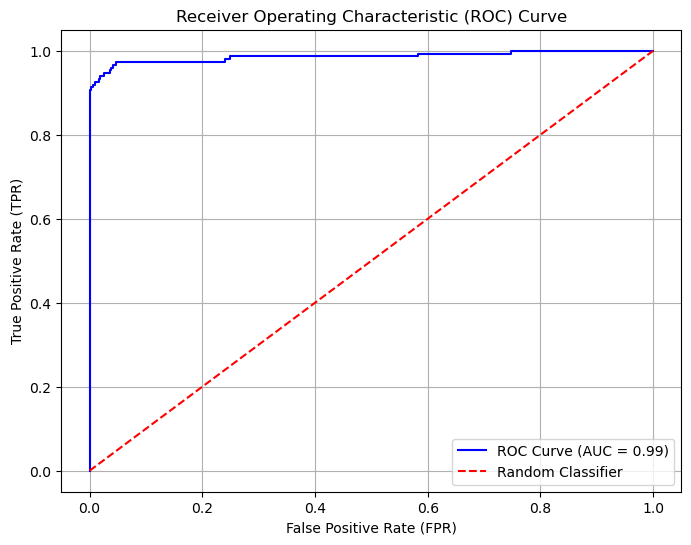

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin1')

# Encode the 'Category' column (ham: 0, spam: 1)
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Split data into features and target
X = data['Message']
y = data['Category']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Convert text to numerical features using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Predict probabilities for the positive class
y_probs = model.predict_proba(X_test_vectorized)[:, 1]

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin1')

# Encode the 'Category' column (ham: 0, spam: 1)
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Separate the features (X) and the target (y)
X = data['Message']
y = data['Category']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the size of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 4457
Testing set size: 1115


Training set size: 4457
Testing set size: 1115


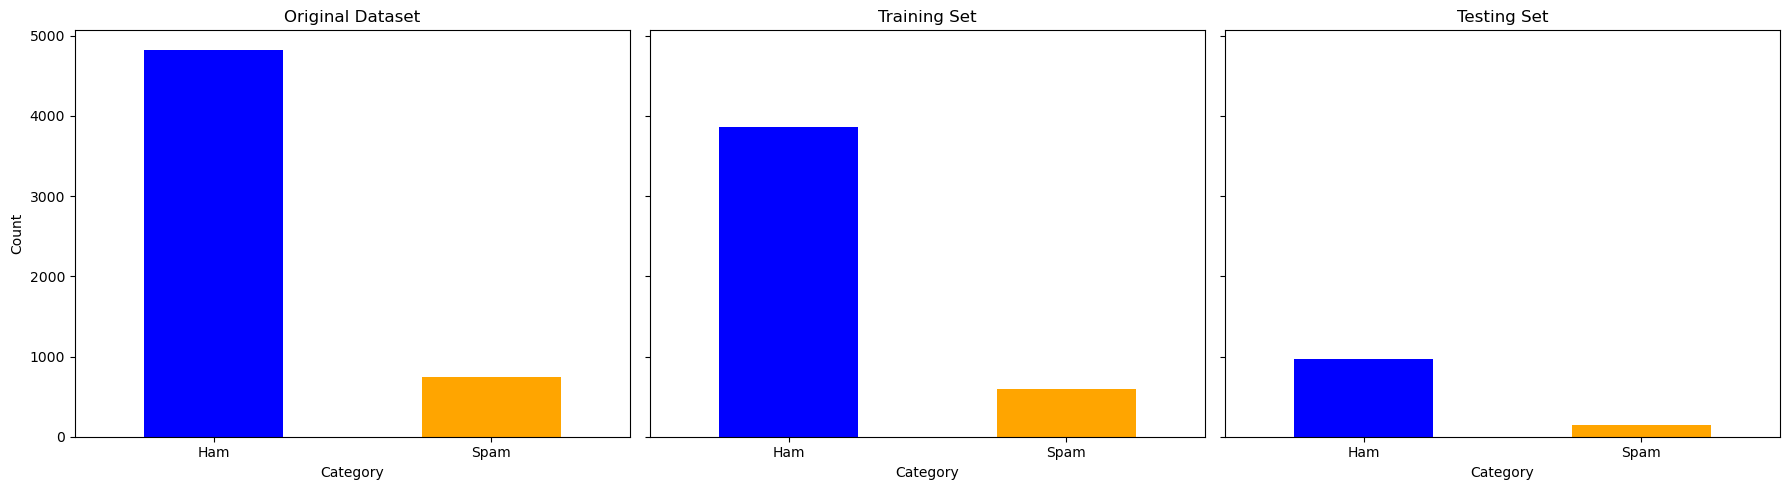

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin1')

# Encode the 'Category' column (ham: 0, spam: 1)
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Separate the features (X) and the target (y)
X = data['Message']
y = data['Category']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the size of the splits
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Plot class distribution in the original, training, and testing sets
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Original dataset distribution
data['Category'].value_counts().plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Original Dataset')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Ham', 'Spam'], rotation=0)

# Training set distribution
y_train.value_counts().plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Training Set')
axes[1].set_xlabel('Category')
axes[1].set_xticklabels(['Ham', 'Spam'], rotation=0)

# Testing set distribution
y_test.value_counts().plot(kind='bar', ax=axes[2], color=['blue', 'orange'])
axes[2].set_title('Testing Set')
axes[2].set_xlabel('Category')
axes[2].set_xticklabels(['Ham', 'Spam'], rotation=0)

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin1')

# Encode the 'Category' column (ham: 0, spam: 1)
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})

# Text cleaning function
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Apply text cleaning
data['Cleaned_Message'] = data['Message'].apply(clean_text)

# Separate features and target
X = data['Cleaned_Message']
y = data['Category']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Output sizes and a sample of the cleaned text
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")
print("\nSample of cleaned text:")
print(data['Cleaned_Message'].head())


[nltk_data] Downloading package stopwords to C:\Users\Angelin
[nltk_data]     mary\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


Training set size: 4457
Testing set size: 1115

Sample of cleaned text:
0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: Cleaned_Message, dtype: object
